In [11]:
import featuretools as ft
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#wczytanie danych
column_names = [
    "pclass", "survived", "name", "sex", "age", "sibsp", "parch",
    "ticket", "fare", "cabin", "embarked", "boat", "body", "home.dest"
]

df = pd.read_csv(
    "titanic.csv",
    names=column_names,
    na_values="?"
)

# Missing Values

In [13]:
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## Cechy
**survival**:	Survival\
**pclass**:	Ticket class\
**sex**:	Sex	\
**age**:	Age in years	\
**sibsp**:	# of siblings / spouses aboard the Titanic	\
**parch**:	# of parents / children aboard the Titanic	\
**ticket**:	Ticket number	\
**fare**:	Passenger fare	\
**cabin**:	Cabin number	\
**embarked**:	Port of Embarkation \
**boat**: Boat number \
**body**: Body data (prawdopodobnie w jakiej kolejności były ciała odnalezione)\
**home.dest**:  Destination 


#### W zbiorze jest 14 cech.
#### Widzimy że brakuje dużo danych w kolumnie "body"
#### Rodzina (sibsp i parch)- ma ten sam numer biletu i destynację - podróżują razem.
#### Część wartości w kolumnie "age" jest dziwnym ułamkiem - jest to wiek dla dzieci w miesiącach


In [15]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [16]:
df.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

Embarked i fare brakuje mniej niż 5 procent - można zignorować, embarked uzupełniłbym najczęściej występującą wartością, fare można średnią.
Embarked i fare to MCAR - missing completely at random.  Embarked można uzupełnić dominantą, a fare medianą.

# Body:

In [17]:
df['KolumnaNull'] = np.where(df['body'].isnull(), 1, 0)
df.groupby(['survived'])['KolumnaNull'].mean()

survived
0    0.850433
1    1.000000
Name: KolumnaNull, dtype: float64

#### Brakuje wszystkich danych body dla ludzi którzy przeżyli - nie znajdywano ciał tych osób
Body: MAR - jest losowe ale zależy też od tego czy dana osoba przeżyła. \
Brak danych oznacza, że ciała nie odnaleziono, na podstawie tej cechy i 'survived' możemy stwierdzić czy osoba przeżyła, czy po prostu ciała nie odnaleziono.

# Boat:

In [18]:
df['KolumnaNull'] = np.where(df['boat'].isnull(), 1, 0)
df.groupby(['survived'])['KolumnaNull'].mean()

survived
0    0.988875
1    0.046000
Name: KolumnaNull, dtype: float64

#### Ludzie co umarli - nie mieli łódek ratunkowych
Boat: MNAR - wartości brakujące związane są z pewną przyczyną - ludzie na łódkach w większości przeżyli, ci którzy nie byli na żadnej łódce częściej ginęli. \
Można przyjąć, że braki z danych wynikają z tego, że dana osoba nie była przypisana do żadnej z łódek. W takim wypadku nie wypełniamy danych, lub wypełniamy nową wartością, aby odróżnić wartości nan od pozostałych danych.

# Cabin

In [19]:
df['KolumnaNull'] = np.where(df['cabin'].isnull(), 1, 0)
df.groupby(['pclass'])['KolumnaNull'].mean()

pclass
1    0.207430
2    0.916968
3    0.977433
Name: KolumnaNull, dtype: float64

#### Cabin nie było wpisywane dla klas 2 i 3
Cabin: MAR - jest losowe ale zależy też od tego w jakiej klasie dana osoba była. \
Brak danych w klasach 2 i 3 może wynikać z braku obsługi niższych klas.\
Można uzupełnić dane na dominantą.


# Home.dest


In [20]:
df['KolumnaNull'] = np.where(df['home.dest'].isnull(), 1, 0)
df.groupby(['survived'])['KolumnaNull'].mean()

survived
0    0.508035
1    0.306000
Name: KolumnaNull, dtype: float64

In [21]:
df['KolumnaNull'] = np.where(df['home.dest'].isnull(), 1, 0)
df.groupby(['pclass'])['KolumnaNull'].mean()

pclass
1    0.105263
2    0.057762
3    0.724965
Name: KolumnaNull, dtype: float64

### Home.dest nie było spisywane dla klasy 3 głównie
Home.dest: MAR - losowe ale zależy w części od klasy. \
Brak danych w klasie 3 może wynikać z braku obsługi niższych klas. \ 
Można uzupełnić dane dominantą.


# Age

In [22]:
df['KolumnaNull'] = np.where(df['age'].isnull(), 1, 0)
df.groupby(['survived'])['KolumnaNull'].mean()

survived
0    0.234858
1    0.146000
Name: KolumnaNull, dtype: float64

<Axes: >

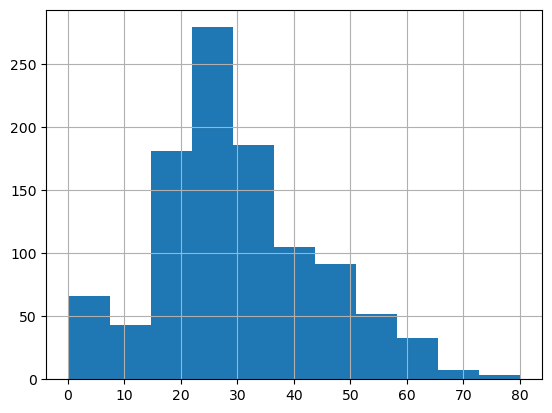

In [26]:
df.isna().sum() #do sprawdzenia gdzie nie ma danych

row_number = df.shape
#zmiana na numeryczny typ ze stringa
df['age'] = pd.to_numeric(df['age'], errors='coerce')

#sprawdzanie rozkładu
df['age'].hist(bins=11)


Age: MCAR - kompletnie losowe. \
Można uzupełnić dane na podstawie rozkładu. Można też użyć mediany lub średniej.